In [ ]:
from google.colab import files

# Upload your Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels


Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.58G/9.58G [04:01<00:00, 43.3MB/s]
100% 9.58G/9.58G [04:01<00:00, 42.6MB/s]


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('chest-xray-masks-and-labels.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/chest_xray_dataset')


In [ ]:
import pandas as pd
import os

# Assuming the dataset is read as shown
image_folder = 'chest_xray_dataset/Lung Segmentation/CXR_png/'
results_folder = 'chest_xray_dataset/Lung Segmentation/ClinicalReadings/'
mask_folder = 'chest_xray_dataset/Lung Segmentation/masks/'

data = []

# Read each result file
for filename in os.listdir(results_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(results_folder, filename), 'r') as file:
            lines = file.readlines()
            if len(lines) < 2:
                continue
            gender_age = lines[0].strip().split()
            if len(gender_age) != 2:
                continue
            gender = gender_age[0].lower()
            age_with_units = gender_age[1]
            try:
                age = int(age_with_units.replace('yrs', ''))
            except ValueError:
                continue
            diagnosis = lines[1].strip().lower()

        image_base_name = filename.replace('.txt', '')
        image_path_png = os.path.join(image_folder, image_base_name + '.png')
        image_path_jpg = os.path.join(image_folder, image_base_name + '.jpg')

        if os.path.exists(image_path_png):
            image_path = image_path_png
        elif os.path.exists(image_path_jpg):
            image_path = image_path_jpg
        else:
            continue

        mask_path = os.path.join(mask_folder, image_base_name + '_mask.png')
        if not os.path.exists(mask_path):
            continue

        data.append([image_path, mask_path, gender, age, diagnosis])

# Create a DataFrame
df_mask = pd.DataFrame(data, columns=['Image', 'Mask', 'Gender', 'Age', 'Diagnosis'])

print(df_mask.head())


                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask  Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   89   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   25   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   48   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   38   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   38   

       Diagnosis  
0  bilateral ptb  
1         normal  
2  bilateral ptb  
3  bilateral ptb  
4         normal  


In [ ]:
# Check for missing values
print(df_mask.isnull().sum())

# Check for incorrect values
print(df_mask.describe(include='all'))

Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64
                                                    Image  \
count                                                 548   
unique                                                548   
top     chest_xray_dataset/Lung Segmentation/CXR_png/C...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     Mask Gender         Age  \
count                                                 548    548  548.000000   
unique             

In [ ]:
# Basic statistics of the dataset
print(df_mask.describe())

# Distribution of Age
print(df_mask['Age'].describe())

# Distribution of Gender
print(df_mask['Gender'].value_counts())

# Distribution of Diagnosis
print(df_mask['Diagnosis'].value_counts())


              Age
count  548.000000
mean    36.189781
std     14.580312
min      1.000000
25%     26.000000
50%     33.000000
75%     44.000000
max     89.000000
count    548.000000
mean      36.189781
std       14.580312
min        1.000000
25%       26.000000
50%       33.000000
75%       44.000000
max       89.000000
Name: Age, dtype: float64
Gender
male       356
female     178
male,        6
female,      5
femal        3
Name: count, dtype: int64
Diagnosis
normal                                                                                                      225
bilateral ptb                                                                                                48
                                                                                                             47
right ptb                                                                                                    42
ptb in the right upper field                                                          

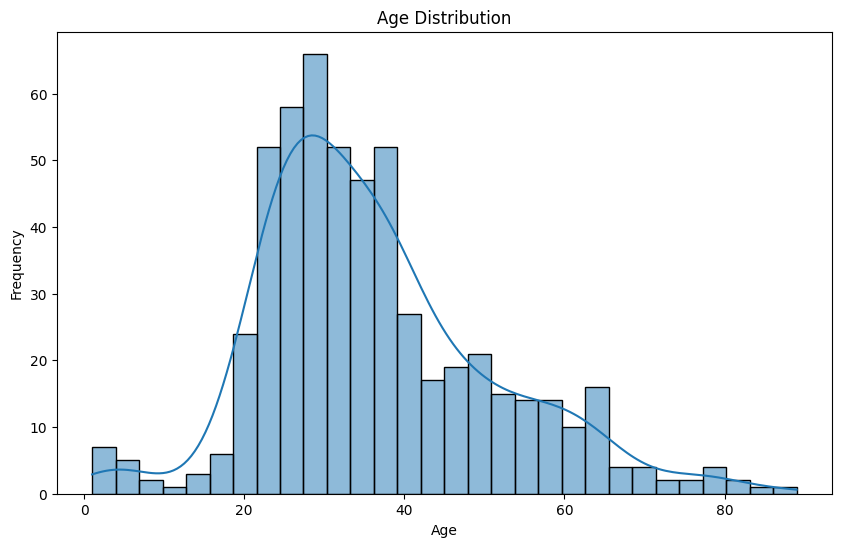

<ipython-input-7-16b7cc0a7444>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_mask, palette='viridis')


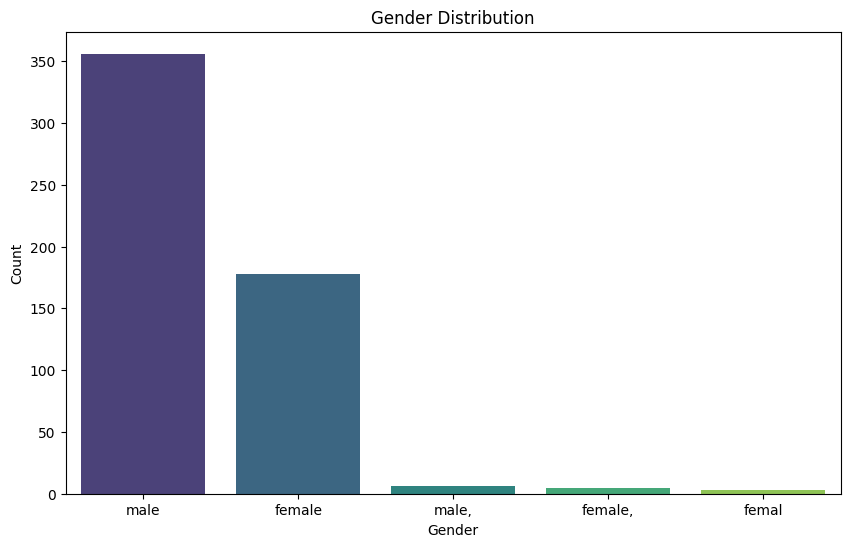

<ipython-input-7-16b7cc0a7444>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Diagnosis', data=df_mask, palette='viridis', order=df_mask['Diagnosis'].value_counts().index)


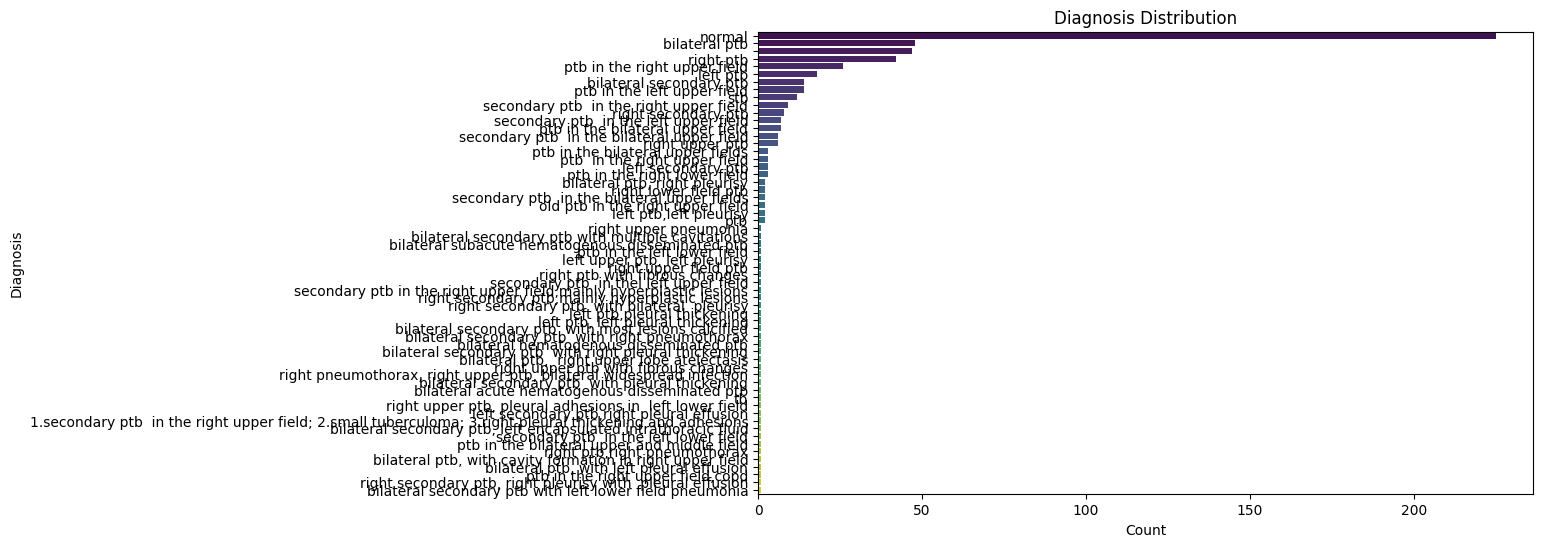

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_mask['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_mask, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Diagnosis distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Diagnosis', data=df_mask, palette='viridis', order=df_mask['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    channel_shift_range=20,        # Random channel shifts
    horizontal_flip=True,
    vertical_flip=True,            # Introduce vertical flips
    fill_mode='nearest'
)

# Example: Applying augmentation to one image and mask
def augment_image_and_mask(image_path, mask_path):
    image = tf.keras.preprocessing.image.load_img(image_path)
    mask = tf.keras.preprocessing.image.load_img(mask_path, color_mode='grayscale')

    image = tf.keras.preprocessing.image.img_to_array(image)
    mask = tf.keras.preprocessing.image.img_to_array(mask)

    image = image.reshape((1,) + image.shape)  # Reshape to (1, height, width, channels)
    mask = mask.reshape((1,) + mask.shape)     # Reshape to (1, height, width, channels)

    # Create an iterator for augmentation
    seed = 1
    image_gen = datagen.flow(image, batch_size=1, seed=seed)
    mask_gen = datagen.flow(mask, batch_size=1, seed=seed)

    augmented_images = []
    augmented_masks = []

    for _ in range(5):  # Generate 5 augmented images and masks
        aug_image = next(image_gen)[0]
        aug_mask = next(mask_gen)[0]

        augmented_images.append(aug_image)
        augmented_masks.append(aug_mask)

    return augmented_images, augmented_masks

# Test the function on one example
example_image_path = df_mask.iloc[0]['Image']
example_mask_path = df_mask.iloc[0]['Mask']
augmented_images, augmented_masks = augment_image_and_mask(example_image_path, example_mask_path)


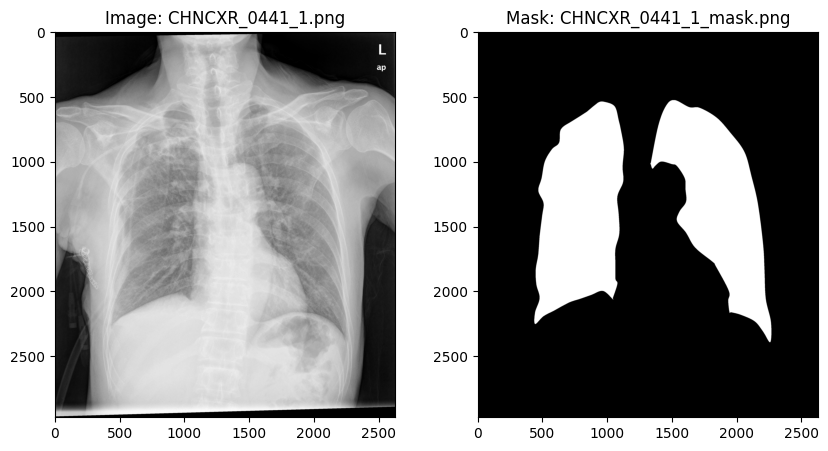

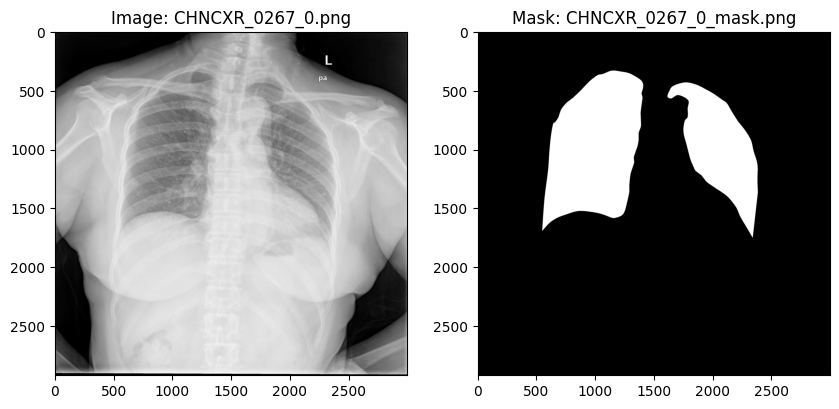

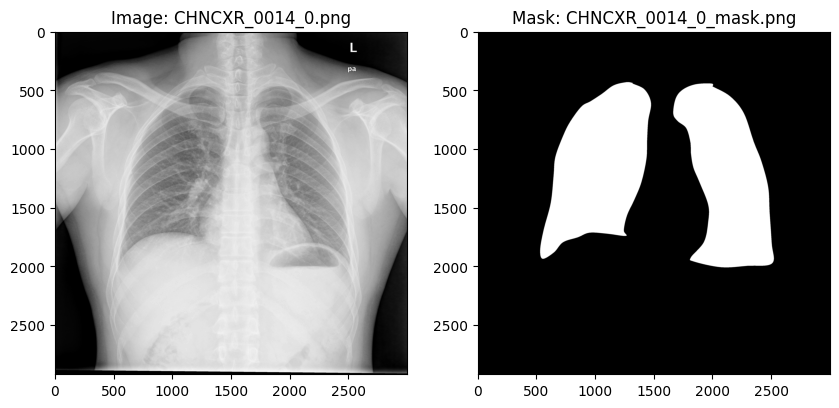

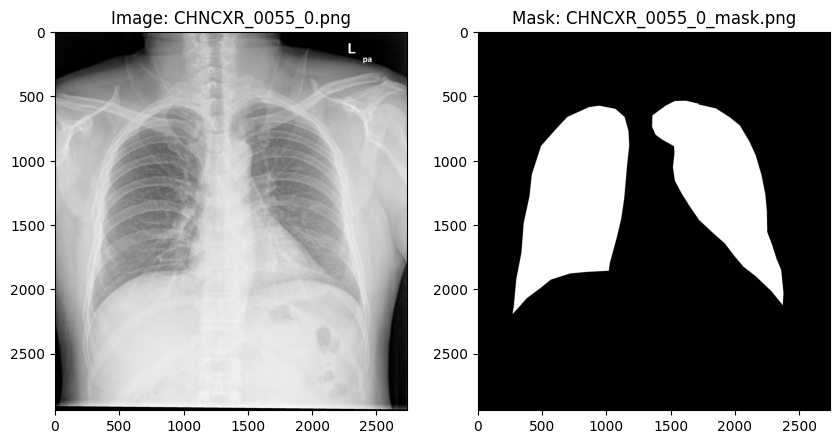

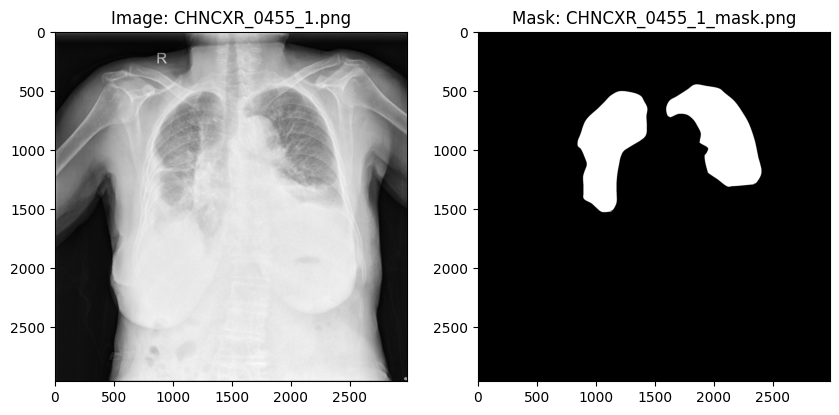

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to display images and masks
def display_samples(df, num_samples=5):
    samples = df.sample(num_samples)
    for index, row in samples.iterrows():
        image = cv2.imread(row['Image'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)  # Load the mask image

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Image: {row['Image'].split('/')[-1]}")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')  # Use the loaded mask variable
        plt.title(f"Mask: {row['Mask'].split('/')[-1]}")

        plt.show()

# Display random samples
display_samples(df_mask, num_samples=5)

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(df):
    images = []
    masks = []
    labels = []
    for index, row in df.iterrows():
        # Load and resize image
        image = cv2.imread(row['Image'], cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))  # Resize image to 224x224
        image = image / 255.0  # Normalize pixel values
        images.append(image)

        # Load and resize mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (224, 224))  # Resize mask to 224x224
        mask = mask / 255.0  # Normalize pixel values
        masks.append(mask)

        # Convert diagnosis to binary label
        labels.append(1 if row['Diagnosis'] == 'normal' else 0)
    return np.array(images), np.array(masks), np.array(labels)

# Assuming you already have the data loaded
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(df_mask, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load and preprocess train, validation, and test data
train_images, train_masks, train_labels = load_data(train_data)
val_images, val_masks, val_labels = load_data(val_data)
test_images, test_masks, test_labels = load_data(test_data)

# Define constants
input_shape = (224, 224, 1)  # Assuming images are resized to 224x224 grayscale
num_models = 3
num_epochs = 10
batch_size = 64

# Function to create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train multiple CNN models
models = []
for _ in range(num_models):
    model = create_model()
    model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
    models.append(model)

# Generate predictions from each CNN model
predictions = []
for model in models:
    predictions.append(model.predict(test_images))

# Combine predictions using averaging
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Ensemble Accuracy:", ensemble_accuracy)


Epoch 1/10
6/6 [==============================] - 23s 3s/step - loss: 9.4726 - accuracy: 0.5457 - val_loss: 0.6062 - val_accuracy: 0.7273
Epoch 2/10
6/6 [==============================] - 20s 3s/step - loss: 1.6801 - accuracy: 0.6629 - val_loss: 0.6844 - val_accuracy: 0.7273
Epoch 3/10
6/6 [==============================] - 19s 3s/step - loss: 0.8342 - accuracy: 0.7229 - val_loss: 1.4083 - val_accuracy: 0.7159
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 1.0957 - accuracy: 0.6857 - val_loss: 0.6082 - val_accuracy: 0.7159
Epoch 5/10
6/6 [==============================] - 19s 3s/step - loss: 0.8991 - accuracy: 0.7200 - val_loss: 2.6447 - val_accuracy: 0.3864
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 1.7859 - accuracy: 0.5914 - val_loss: 0.5880 - val_accuracy: 0.7045
Epoch 7/10
6/6 [==============================] - 21s 3s/step - loss: 0.8162 - accuracy: 0.7457 - val_loss: 0.5887 - val_accuracy: 0.7500
Epoch 8/10
6/6 [==================

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[47 14]
 [10 39]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, (ensemble_predictions > 0.5).astype(int))
recall = recall_score(test_labels, (ensemble_predictions > 0.5).astype(int))
f1 = f1_score(test_labels, (ensemble_predictions > 0.5).astype(int))

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7358490566037735
Recall: 0.7959183673469388
F1-score: 0.7647058823529412


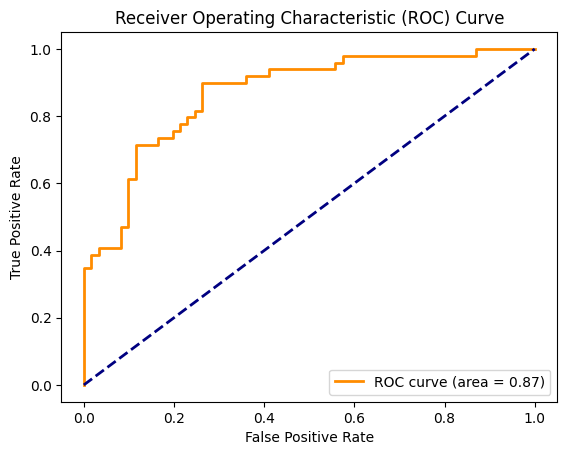

AUC: 0.8685178989628638


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(test_labels, ensemble_predictions)
roc_auc = roc_auc_score(test_labels, ensemble_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(df):
    images = []
    masks = []
    labels = []
    for index, row in df.iterrows():
        # Load and resize image
        image = cv2.imread(row['Image'], cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))  # Resize image to 224x224
        image = image / 255.0  # Normalize pixel values
        images.append(image)

        # Load and resize mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (224, 224))  # Resize mask to 224x224
        mask = mask / 255.0  # Normalize pixel values
        masks.append(mask)

        # Convert diagnosis to binary label
        labels.append(1 if row['Diagnosis'] == 'normal' else 0)
    return np.array(images), np.array(masks), np.array(labels)

# Assuming you already have the data loaded
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(df_mask, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load and preprocess train, validation, and test data
train_images, train_masks, train_labels = load_data(train_data)
val_images, val_masks, val_labels = load_data(val_data)
test_images, test_masks, test_labels = load_data(test_data)

# Define constants
input_shape = (224, 224, 1)  # Assuming images are resized to 224x224 grayscale
num_models = 3
num_epochs = 14
batch_size = 32

# Function to create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train multiple CNN models
models = []
for _ in range(num_models):
    model = create_model()
    model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
    models.append(model)

# Generate predictions from each CNN model
predictions = []
for model in models:
    predictions.append(model.predict(test_images))

# Combine predictions using averaging
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Ensemble Accuracy:", ensemble_accuracy)


Epoch 1/14
11/11 [==============================] - 26s 2s/step - loss: 10.3499 - accuracy: 0.5114 - val_loss: 5.8226 - val_accuracy: 0.3409
Epoch 2/14
11/11 [==============================] - 24s 2s/step - loss: 2.5271 - accuracy: 0.5543 - val_loss: 0.6146 - val_accuracy: 0.7386
Epoch 3/14
11/11 [==============================] - 23s 2s/step - loss: 1.0191 - accuracy: 0.6657 - val_loss: 0.6127 - val_accuracy: 0.7727
Epoch 4/14
11/11 [==============================] - 24s 2s/step - loss: 0.6535 - accuracy: 0.7400 - val_loss: 0.6141 - val_accuracy: 0.6818
Epoch 5/14
11/11 [==============================] - 23s 2s/step - loss: 0.4930 - accuracy: 0.7886 - val_loss: 0.5411 - val_accuracy: 0.7500
Epoch 6/14
11/11 [==============================] - 24s 2s/step - loss: 0.3695 - accuracy: 0.8314 - val_loss: 0.5074 - val_accuracy: 0.7045
Epoch 7/14
11/11 [==============================] - 22s 2s/step - loss: 0.2788 - accuracy: 0.8914 - val_loss: 0.5264 - val_accuracy: 0.6932
Epoch 8/14
11/11 [=

Confusion Matrix:
 [[48 13]
 [16 33]]
Precision: 0.717391304347826
Recall: 0.673469387755102
F1-score: 0.6947368421052631


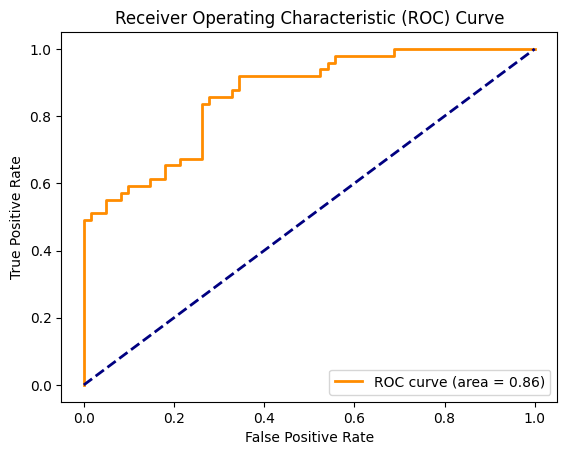

AUC: 0.8628303780528606


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Confusion Matrix:\n", conf_matrix)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, (ensemble_predictions > 0.5).astype(int))
recall = recall_score(test_labels, (ensemble_predictions > 0.5).astype(int))
f1 = f1_score(test_labels, (ensemble_predictions > 0.5).astype(int))

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(test_labels, ensemble_predictions)
roc_auc = roc_auc_score(test_labels, ensemble_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)



In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(df):
    images = []
    masks = []
    labels = []
    for index, row in df.iterrows():
        # Load and resize image
        image = cv2.imread(row['Image'], cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))  # Resize image to 224x224
        image = image / 255.0  # Normalize pixel values
        images.append(image)

        # Load and resize mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (224, 224))  # Resize mask to 224x224
        mask = mask / 255.0  # Normalize pixel values
        masks.append(mask)

        # Convert diagnosis to binary label
        labels.append(1 if row['Diagnosis'] == 'normal' else 0)
    return np.array(images), np.array(masks), np.array(labels)

# Assuming you already have the data loaded
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(df_mask, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load and preprocess train, validation, and test data
train_images, train_masks, train_labels = load_data(train_data)
val_images, val_masks, val_labels = load_data(val_data)
test_images, test_masks, test_labels = load_data(test_data)

# Define constants
input_shape = (224, 224, 1)  # Assuming images are resized to 224x224 grayscale
num_models = 3
num_epochs = 18
batch_size = 16

# Function to create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train multiple CNN models
models = []
for _ in range(num_models):
    model = create_model()
    model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
    models.append(model)

# Generate predictions from each CNN model
predictions = []
for model in models:
    predictions.append(model.predict(test_images))

# Combine predictions using averaging
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Ensemble Accuracy:", ensemble_accuracy)


Epoch 1/18
22/22 [==============================] - 33s 1s/step - loss: 5.1034 - accuracy: 0.5629 - val_loss: 1.5856 - val_accuracy: 0.6705
Epoch 2/18
22/22 [==============================] - 31s 1s/step - loss: 1.3755 - accuracy: 0.6829 - val_loss: 0.5217 - val_accuracy: 0.6591
Epoch 3/18
22/22 [==============================] - 31s 1s/step - loss: 0.4944 - accuracy: 0.7543 - val_loss: 0.4242 - val_accuracy: 0.7727
Epoch 4/18
22/22 [==============================] - 32s 1s/step - loss: 0.3990 - accuracy: 0.8400 - val_loss: 0.4700 - val_accuracy: 0.7159
Epoch 5/18
22/22 [==============================] - 31s 1s/step - loss: 0.3221 - accuracy: 0.8657 - val_loss: 0.4755 - val_accuracy: 0.7955
Epoch 6/18
22/22 [==============================] - 31s 1s/step - loss: 0.2798 - accuracy: 0.8914 - val_loss: 0.5597 - val_accuracy: 0.7841
Epoch 7/18
22/22 [==============================] - 31s 1s/step - loss: 0.2071 - accuracy: 0.9429 - val_loss: 0.5008 - val_accuracy: 0.7273
Epoch 8/18
22/22 [==

Confusion Matrix:
 [[46 15]
 [15 34]]
Precision: 0.6938775510204082
Recall: 0.6938775510204082
F1-score: 0.6938775510204082


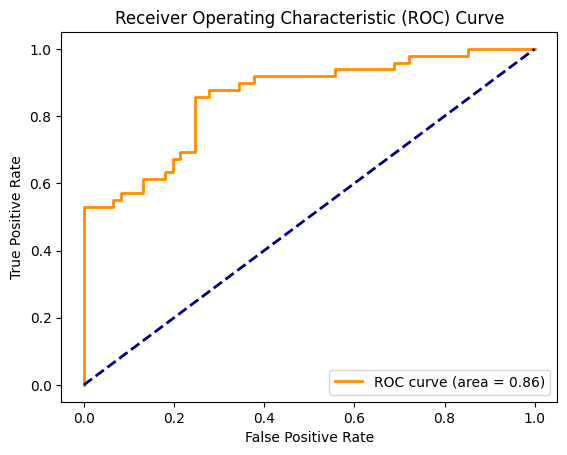

AUC: 0.8574774171963867


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Confusion Matrix:\n", conf_matrix)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, (ensemble_predictions > 0.5).astype(int))
recall = recall_score(test_labels, (ensemble_predictions > 0.5).astype(int))
f1 = f1_score(test_labels, (ensemble_predictions > 0.5).astype(int))

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(test_labels, ensemble_predictions)
roc_auc = roc_auc_score(test_labels, ensemble_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Function to augment a single image and mask
def augment_image_and_mask(image, mask, num_augmentations=5):
    image = image.reshape((1,) + image.shape + (1,))  # Reshape to (1, height, width, 1)
    mask = mask.reshape((1,) + mask.shape + (1,))     # Reshape to (1, height, width, 1)

    # Create an iterator for augmentation
    seed = 1
    image_gen = datagen.flow(image, batch_size=1, seed=seed)
    mask_gen = datagen.flow(mask, batch_size=1, seed=seed)

    augmented_images = []
    augmented_masks = []

    for _ in range(num_augmentations):
        aug_image = next(image_gen)[0]
        aug_mask = next(mask_gen)[0]
        augmented_images.append(aug_image)
        augmented_masks.append(aug_mask)

    return np.array(augmented_images), np.array(augmented_masks)

# Function to load and preprocess data with augmentation for training data
def load_and_augment_data(df, augment=False):
    images = []
    masks = []
    labels = []
    for index, row in df.iterrows():
        # Load and resize image
        image = cv2.imread(row['Image'], cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0

        # Load and resize mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (224, 224))
        mask = mask / 255.0

        if augment:
            aug_images, aug_masks = augment_image_and_mask(image, mask)
            images.extend(aug_images)
            masks.extend(aug_masks)
            labels.extend([1 if row['Diagnosis'] == 'normal' else 0] * len(aug_images))
        else:
            images.append(image.reshape((224, 224, 1)))  # Add channel dimension
            masks.append(mask.reshape((224, 224, 1)))    # Add channel dimension
            labels.append(1 if row['Diagnosis'] == 'normal' else 0)
    return np.array(images), np.array(masks), np.array(labels)

# Assuming you already have the data loaded
# Split the data into train, validation, and test sets
train_data, test_data = train_test_split(df_mask, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load and preprocess train, validation, and test data
train_images, train_masks, train_labels = load_and_augment_data(train_data, augment=True)
val_images, val_masks, val_labels = load_and_augment_data(val_data, augment=False)
test_images, test_masks, test_labels = load_and_augment_data(test_data, augment=False)

# Define constants
input_shape = (224, 224, 1)
num_models = 3
num_epochs = 10
batch_size = 64

# Function to create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train multiple CNN models
models = []
for _ in range(num_models):
    model = create_model()
    model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))
    models.append(model)

# Generate predictions from each CNN model
predictions = []
for model in models:
    predictions.append(model.predict(test_images))

# Combine predictions using averaging
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(test_labels, (ensemble_predictions > 0.5).astype(int))
print("Ensemble Accuracy:", ensemble_accuracy)


Epoch 1/10
28/28 [==============================] - 98s 4s/step - loss: 0.6923 - accuracy: 0.5829 - val_loss: 0.6780 - val_accuracy: 0.6591
Epoch 2/10
28/28 [==============================] - 88s 3s/step - loss: 0.6905 - accuracy: 0.5829 - val_loss: 0.6752 - val_accuracy: 0.6591
Epoch 3/10
28/28 [==============================] - 98s 4s/step - loss: 0.6891 - accuracy: 0.5829 - val_loss: 0.6729 - val_accuracy: 0.6591
Epoch 4/10
28/28 [==============================] - 83s 3s/step - loss: 0.6878 - accuracy: 0.5829 - val_loss: 0.6705 - val_accuracy: 0.6591
Epoch 5/10
28/28 [==============================] - 86s 3s/step - loss: 0.6867 - accuracy: 0.5829 - val_loss: 0.6684 - val_accuracy: 0.6591
Epoch 6/10
28/28 [==============================] - 82s 3s/step - loss: 0.6856 - accuracy: 0.5829 - val_loss: 0.6667 - val_accuracy: 0.6591
Epoch 7/10
28/28 [==============================] - 82s 3s/step - loss: 0.6847 - accuracy: 0.5829 - val_loss: 0.6650 - val_accuracy: 0.6591
Epoch 8/10
28/28 [==